In [1]:
import torch
import tangermeme.seqlet
import tangermeme.plot
import matplotlib.pyplot as plt

Generate 50 random sequences of length 100 with random attributions in the interval [-1,1)

In [3]:
g_cpu = torch.Generator()
g_cpu.manual_seed(2147483647)
X = torch.rand((50,100), generator = g_cpu)*2-1

In [5]:
seqlets = tangermeme.seqlet.recursive_seqlets(X, threshold = 0.01)
seqlets

,example_idx,start,end,attribution,p-value
0,23,17,21,3.300204,0.000402
1,9,89,93,3.036839,0.004016


In [11]:
X[9, 89:93].sum()

tensor(3.0368)

In [12]:
X_rev = torch.flip(X, dims = (1,))
rseqlets = tangermeme.seqlet.recursive_seqlets(X_rev, threshold = 0.01)
rseqlets['rev_start'] = 100 - rseqlets['end']
rseqlets['rev_end'] = 100 - rseqlets['start']
rseqlets

,example_idx,start,end,attribution,p-value,rev_start,rev_end
0,9,6,10,3.046904,0.003210,90,94
1,15,1,5,-2.931187,0.008232,95,99


In [15]:
X_rev[9, 6:10].sum(), X_rev[9, 7:11].sum()

(tensor(3.0469), tensor(3.0368))

In [16]:
motif = torch.arange(0.1,1.7,0.2)
X[0, 10:18] = motif
X[0, 18:26] = torch.flip(motif, dims = (0,))

In [17]:
seqlets = tangermeme.seqlet.recursive_seqlets(X, threshold = 0.01)
seqlets

,example_idx,start,end,attribution,p-value
0,0,14,23,10.3,0.001204


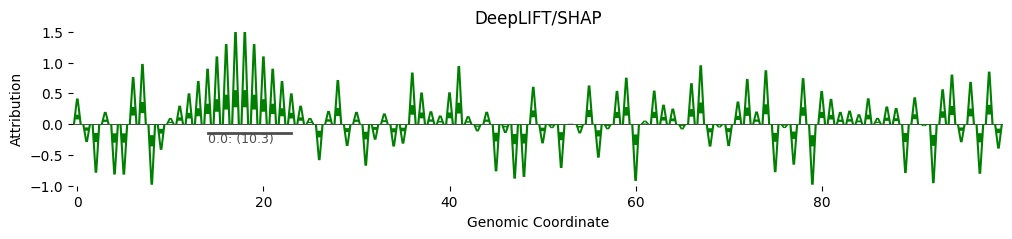

In [18]:
idx = 0
plt.figure(figsize=(12, 2))
ax = plt.subplot(111)
t = torch.stack([X[idx], torch.zeros_like(X[idx]), torch.zeros_like(X[idx]), torch.zeros_like(X[idx])])
tangermeme.plot.plot_logo(t, ax=ax, start=0, end=100, annotations=seqlets[seqlets['example_idx'] == idx], score_key='attribution', show_extra=False)
plt.ylim(-1, 1.5)

plt.xlabel("Genomic Coordinate")
plt.ylabel("Attribution")
plt.title("DeepLIFT/SHAP")
plt.show()

In [26]:
seqlets = tangermeme.seqlet.recursive_seqlets(X, threshold = 0.01, min_seqlet_len = 8)
seqlets

,example_idx,start,end,attribution,p-value
0,3,42,51,-6.058445,3.330669e-15
1,45,32,41,-5.942907,4.662005e-04
2,0,12,25,12.300000,1.237113e-03
3,9,84,95,7.908638,3.949100e-03
4,35,43,51,-4.664525,5.057471e-03
5,9,30,38,-5.367475,5.509642e-03


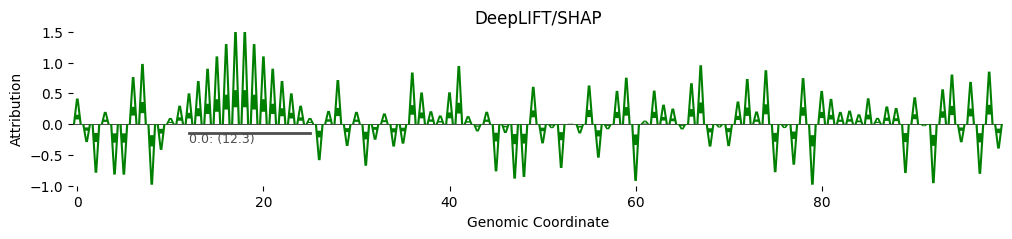

In [27]:
idx = 0
plt.figure(figsize=(12, 2))
ax = plt.subplot(111)
t = torch.stack([X[idx], torch.zeros_like(X[idx]), torch.zeros_like(X[idx]), torch.zeros_like(X[idx])])
tangermeme.plot.plot_logo(t, ax=ax, start=0, end=100, annotations=seqlets[seqlets['example_idx'] == idx], score_key='attribution', show_extra=False)
plt.ylim(-1, 1.5)

plt.xlabel("Genomic Coordinate")
plt.ylabel("Attribution")
plt.title("DeepLIFT/SHAP")
plt.show()